# Who Wants Shots?
<center> <img src="./Images/myriam-zilles-Ep941iDLwhk-unsplash.jpg" alt="Sick Stuffy" width="800"/> </center>
<center> Photo by <a href="https://unsplash.com/@myriamzilles?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Myriam Zilles</a> on <a href="https://unsplash.com/collections/IUPhDJeZav4/flu-vaccination-social?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a> </center>
  
### Not that kind! 


Utilizing data courtesy of the United States National Center for Health Statistics, I hope to be able to predict whether or not a given citizen will choose to be vaccinated based on existing patterns from past survey results. 

Stakeholder: Small research firm on behalf of the Office of Infectious Diseases (subdivision of the US Department of Health and Human Services).

Business Problem: Guiding public health efforts with regard to vaccination status based on underlying patterns in the opinions, backgrounds, educations and other factors in the general population. 

Target Variable - H1N1 or Seasonal Flu Vaccine 


Target Metric - 


## Data Understanding
Here we have a dataset provided by the US National Center for Health Statistics. The merged dataframe consists of 26,707 survey responses to 37 questions. Some questions were not answered by the respondents. 

Columns represent the questions asked in the survey, while rows represent the survey respondents. 

Survey questions/column headers are as follows:
 * h1n1_concern - Level of concern about the H1N1 flu. 
     * Ranked from 0 (not at all concerned) to 3 (very concerned).
 * h1n1_knowledge - Level of knowledge about H1N1 flu. 
     * Ranked from 0 (no knowledge) to 2 (a lot of knowledge).
 * behavioral_antiviral_meds - Has respondent taken antiviral medication? Yes/No (binary)
 * behavioral_avoidance - Has respondent avoided close contact with others with flu-like symptoms? Yes/No (binary)
 * behavioral_face_mask - Has respondent bought a face mask? Yes/No (binary)
 * behavioral_wash_hands - Has respondent frequently washed hands or used hand sanitizer? Yes/No (binary)
 * behavioral_large_gatherings - Has respondent reduced time at large gatherings? Yes/No (binary)
 * behavioral_outside_home - Has respondent reduced contact with people outside of own household? Yes/No (binary)
 * behavioral_touch_face - Has respondent avoided touching face(including eyes, nose, mouth, etc)? Yes/No (binary)
 * doctor_recc_h1n1 - Was H1N1 flu vaccine recommended by doctor? Yes/No (binary)
 * doctor_recc_seasonal - Was Seasonal flu vaccine recommended by doctor? Yes/No (binary)
 * chronic_med_condition - Does respondent have chronic medical condition? Yes/No (binary) Conditions include: asthma or other lung condition, diabetes, heart condition, kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. 
 * child_under_6_months - Does respondent have regular close contact with a child under the age of six months? Yes/No (binary)
 * health_worker - Is respondent a healthcare worker? Yes/No (binary)
 * health_insurance - Does respondent have health insurance? Yes/No (binary)
 * opinion_h1n1_vacc_effective - Respondent's personal opinion about H1N1 vaccine effectiveness
     * Ranked from 1 (not at all effective) to 5 (very effective).
 * opinion_h1n1_risk - Respondent's personal opinion about risk of getting sick with H1N1 flu without vaccine 
     * Ranked from 1 (very low) to 5 (very high)
 * opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine 
     * Ranked from 1 (not at all worried) to 5 (very worried)
 * opinion_seas_vacc_effective - Respondent's personal opinion about seasonal flu vaccine effectiveness 
     * Ranked from 1 (not at all effective) to 5 (very effective)
 * opinion_seas_risk - Respondent's personal opinion about risk of getting sick with seasonal flu without vaccine 
     * Ranked from 1 (very low) to 5 (very high)
 * opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine 
     * Ranked from 1 (not at all worried) to 5 (very worried).
 * age_group - Age group of respondent - Ranges are 18-34, 35-44, 45-54, 55-64, and 65+ Years.
 * education - Self-reported education level. Less than 12 years, 12 years, Some College, or College Graduate.
 * race - Race of respondent. White, Black, Hispanic, and Other/Multiple.
 * sex - Sex of respondent. Male or Female 
 * income_poverty - Respondent annual household income with respect to 2008 Census poverty thresholds.
     * "Below Poverty", "<= \\$75,000 Above Poverty" , or "> \\$75,000"
 * marital_status - Marital status of respondent.
     * Married or Not Married
 * rent_or_own - Housing situation of respondent.
     * Rent or Own
 * employment_status - Employment status of respondent.
     * Employed, Not in Labor Force, or Unemployed
 * hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
 * census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
 * household_adults - Number of OTHER adults in household, responses range 0 through 3.
 * household_children - Number of children in household, responses range 0 to 3.
 * employment_industry - Industry respondent is employed in. Values are represented as random, encoded character strings.
 * employment_occupation - Occupation of respondent. Values are represented as random, encoded character strings.

In [247]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 
%matplotlib inline


In [248]:
labels = pd.read_csv('Data/training_set_labels.csv')
labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [249]:
features = pd.read_csv('Data/training_set_features.csv')
features

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [250]:
#merge labels and features together in one DF
df = pd.merge(features,labels, on='respondent_id')
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [251]:
#figure out what's goin on in here... looks like I've got some objects and nulls to deal with.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [252]:
#employment industry and occupation appear to be encoded for anonymity. Will operate under the assumption the
#stakeholder knows the keys to these encoded values
#Nulls should be filled with 'Unknown' so that we can OHE these features for modeling. Employment could be a 
#valuable feature and there are many missing values here.
df.employment_industry.value_counts()

fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: employment_industry, dtype: int64

In [253]:
#like above, could be important feature - will operate under the assumption of encoded for anonymity and 
#stakeholder knows keys for these values
df.hhs_geo_region.value_counts()

lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: hhs_geo_region, dtype: int64

In [254]:
#good feature - looks good to OHE
df.income_poverty.value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

In [255]:
df.sex.value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

In [256]:
df.race.value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [257]:
df.age_group.value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

In [258]:
df.census_msa.value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

In [259]:
df.education.value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64

In [260]:
df.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [261]:
df.household_adults.value_counts()

1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: household_adults, dtype: int64

# Data Analysis
Through EDA, there are several object columns that will need to be One Hot Encoded in order to be modeled, including age_group, education, race, sec, marital_status, and employment_industry and occupation, among others. These could turn out to be important features, so I will encode and handle any null values so as to have as much data for modeling as possible. 

There are quite a few missing values, with highest count seen in employment industry and occupation and health insurance. I will add an "Unknown" or "Not Answered" value to encode those missing values so as to not lose any rows. Missing values in the numeric columns will be assessed and filled with mean, median or mode depending on the column and the assessment (TBD). 

### H1N1 Target Modeling - Data Preparation


In [262]:
#drop seasonal flu vaccine columns from h1n1 dataframe.
h1_df = df.drop(columns=['opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
                 'seasonal_vaccine', 'doctor_recc_seasonal'], axis= 1)
h1_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [351]:
h1_df.h1n1_vaccine.value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

In [263]:
h1_df.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
hhs_geo_region                     0
c

In [264]:
y = h1_df['h1n1_vaccine']
X = h1_df.drop('h1n1_vaccine', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

In [265]:
X_train.describe()
#fill na strategy - fill na with median value (0 or 1) for binary missing values and median for numeric columns. 
#fill na strategy for object columns: fill with "unknown" so OHE adds a column for those 

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children
count,20030.000000,19962.000000,19933.000000,19979.000000,19865.000000,20017.000000,19998.000000,19961.000000,19959.000000,19936.000000,18399.000000,19272.000000,19398.000000,19410.000000,10781.000000,19723.000000,19725.000000,19720.000000,19835.000000,19835.000000
mean,13338.956316,1.620128,1.264988,0.048451,0.726051,0.068941,0.829283,0.358549,0.338694,0.677819,0.221425,0.283728,0.083565,0.112674,0.881922,3.853825,2.343878,2.361613,0.887925,0.535064
std,7708.315555,0.908588,0.615716,0.214722,0.445994,0.253361,0.376271,0.479586,0.473278,0.467324,0.415217,0.450818,0.276742,0.316202,0.322716,1.003431,1.288776,1.364320,0.756667,0.928262
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6682.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,13327.500000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20026.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [266]:
X_train.child_under_6_months.mode()

0    0.0
dtype: float64

In [267]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 23070 to 24894
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                20030 non-null  int64  
 1   h1n1_concern                 19962 non-null  float64
 2   h1n1_knowledge               19933 non-null  float64
 3   behavioral_antiviral_meds    19979 non-null  float64
 4   behavioral_avoidance         19865 non-null  float64
 5   behavioral_face_mask         20017 non-null  float64
 6   behavioral_wash_hands        19998 non-null  float64
 7   behavioral_large_gatherings  19961 non-null  float64
 8   behavioral_outside_home      19959 non-null  float64
 9   behavioral_touch_face        19936 non-null  float64
 10  doctor_recc_h1n1             18399 non-null  float64
 11  chronic_med_condition        19272 non-null  float64
 12  child_under_6_months         19398 non-null  float64
 13  health_worke

In [268]:
obj_cols = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 
        'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 
        'employment_occupation']
X_train[obj_cols].fillna(value='Unknown')

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
23070,18 - 34 Years,12 Years,Other or Multiple,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",Unknown,Unknown
23401,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,atmpeygn,Non-MSA,Unknown,Unknown
23924,65+ Years,12 Years,White,Female,Unknown,Not Married,Rent,Not in Labor Force,kbazzjca,Non-MSA,Unknown,Unknown
13606,45 - 54 Years,College Graduate,White,Female,Unknown,Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",fcxhlnwr,cmhcxjea
21570,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Not Principle City",Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1175,18 - 34 Years,Some College,White,Female,"> $75,000",Married,Own,Employed,lrircsnp,"MSA, Not Principle City",fcxhlnwr,cmhcxjea
24831,45 - 54 Years,Some College,White,Female,"> $75,000",Married,Own,Employed,fpwskwrf,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2934,45 - 54 Years,College Graduate,White,Female,"> $75,000",Not Married,Own,Employed,atmpeygn,"MSA, Not Principle City",saaquncn,xtkaffoo
6618,55 - 64 Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Not Principle City",Unknown,Unknown


In [269]:
X_train.isna().sum()

respondent_id                      0
h1n1_concern                      68
h1n1_knowledge                    97
behavioral_antiviral_meds         51
behavioral_avoidance             165
behavioral_face_mask              13
behavioral_wash_hands             32
behavioral_large_gatherings       69
behavioral_outside_home           71
behavioral_touch_face             94
doctor_recc_h1n1                1631
chronic_med_condition            758
child_under_6_months             632
health_worker                    620
health_insurance                9249
opinion_h1n1_vacc_effective      307
opinion_h1n1_risk                305
opinion_h1n1_sick_from_vacc      310
age_group                          0
education                       1080
race                               0
sex                                0
income_poverty                  3313
marital_status                  1074
rent_or_own                     1560
employment_status               1131
hhs_geo_region                     0
c

In [270]:
#Imputing "Unknown" into object columns for missing values on columns where survey was not answered
cat_cols = ['age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa','employment_industry', 'employment_occupation']
cat_imp = SimpleImputer(strategy="constant", fill_value="Unknown")
cat_imp.fit(X_train[cat_cols])
X_train_cats = pd.DataFrame(cat_imp.transform(X_train[cat_cols]), columns = X_train[cat_cols].columns)
X_train_cats

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,18 - 34 Years,12 Years,Other or Multiple,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",Unknown,Unknown
1,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,atmpeygn,Non-MSA,Unknown,Unknown
2,65+ Years,12 Years,White,Female,Unknown,Not Married,Rent,Not in Labor Force,kbazzjca,Non-MSA,Unknown,Unknown
3,45 - 54 Years,College Graduate,White,Female,Unknown,Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",fcxhlnwr,cmhcxjea
4,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Not Principle City",Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
20025,18 - 34 Years,Some College,White,Female,"> $75,000",Married,Own,Employed,lrircsnp,"MSA, Not Principle City",fcxhlnwr,cmhcxjea
20026,45 - 54 Years,Some College,White,Female,"> $75,000",Married,Own,Employed,fpwskwrf,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
20027,45 - 54 Years,College Graduate,White,Female,"> $75,000",Not Married,Own,Employed,atmpeygn,"MSA, Not Principle City",saaquncn,xtkaffoo
20028,55 - 64 Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Not Principle City",Unknown,Unknown


In [271]:
#confirming correction worked
X_train_cats.isna().sum()

age_group                0
education                0
race                     0
sex                      0
income_poverty           0
marital_status           0
rent_or_own              0
employment_status        0
hhs_geo_region           0
census_msa               0
employment_industry      0
employment_occupation    0
dtype: int64

In [272]:
#Imputing median value on numerical columns where survey response was not recorded.
num_cols = ['respondent_id','h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc','household_adults',
       'household_children']
num_imp = SimpleImputer(strategy='median')
num_imp.fit(X_train[num_cols])
X_train_nums = pd.DataFrame(num_imp.transform(X_train[num_cols]), columns = X_train[num_cols].columns)
X_train_nums

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children
0,23070.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0
1,23401.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,4.0,1.0,0.0
2,23924.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,0.0,0.0
3,13606.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,1.0,3.0,0.0
4,21570.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,1175.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,1.0,1.0
20026,24831.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,4.0,0.0,0.0
20027,2934.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,2.0,4.0,1.0,0.0
20028,6618.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0


In [273]:
#combining imputed columns back into X_train with no missing values
X_train = pd.concat([X_train_nums, X_train_cats], axis=1)
X_train

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,23070.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,Other or Multiple,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",Unknown,Unknown
1,23401.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,atmpeygn,Non-MSA,Unknown,Unknown
2,23924.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,Unknown,Not Married,Rent,Not in Labor Force,kbazzjca,Non-MSA,Unknown,Unknown
3,13606.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,Unknown,Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",fcxhlnwr,cmhcxjea
4,21570.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Not Principle City",Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,1175.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Female,"> $75,000",Married,Own,Employed,lrircsnp,"MSA, Not Principle City",fcxhlnwr,cmhcxjea
20026,24831.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Female,"> $75,000",Married,Own,Employed,fpwskwrf,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
20027,2934.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"> $75,000",Not Married,Own,Employed,atmpeygn,"MSA, Not Principle City",saaquncn,xtkaffoo
20028,6618.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Not Principle City",Unknown,Unknown


In [274]:
#Imputing the "unknown" values for the object columns on the test set
X_test_cats = pd.DataFrame(cat_imp.transform(X_test[cat_cols]), columns = X_test[cat_cols].columns)

In [275]:
#Imputing the median values for the number columns on the test set
X_test_nums = pd.DataFrame(num_imp.transform(X_test[num_cols]), columns = X_test[num_cols].columns)

In [276]:
#Combining the imputed columns back into X_test
X_test = pd.concat([X_test_nums, X_test_cats], axis=1)
X_test

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,8384.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",ldnlellj,xtkaffoo
1,9734.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Other or Multiple,Female,"> $75,000",Not Married,Own,Employed,bhuqouqj,"MSA, Principle City",fcxhlnwr,Unknown
2,9815.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Hispanic,Female,Below Poverty,Married,Rent,Not in Labor Force,mlyzmhmf,"MSA, Principle City",Unknown,Unknown
3,16751.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Female,"> $75,000",Married,Own,Employed,fpwskwrf,"MSA, Not Principle City",wxleyezf,emcorrxb
4,5059.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lzgpxyit,"MSA, Principle City",Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6672,7330.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Other or Multiple,Male,Unknown,Not Married,Rent,Not in Labor Force,oxchjgsf,"MSA, Principle City",Unknown,Unknown
6673,4275.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,bhuqouqj,Non-MSA,atmlpfrs,qxajmpny
6674,4692.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,fpwskwrf,"MSA, Not Principle City",wxleyezf,cmhcxjea
6675,15358.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,"MSA, Principle City",saaquncn,vlluhbov


In [277]:
#Dummying out the "object" columns on the train data
ohe = OneHotEncoder(sparse=False)
X_train_dum = X_train.select_dtypes('object')
dums = ohe.fit_transform(X_train_dum)
dums_df = pd.DataFrame(dums,
                       columns=ohe.get_feature_names(),
                       index=X_train_dum.index)
dums_df.head()

,x0_18 - 34 Years,x0_35 - 44 Years,x0_45 - 54 Years,x0_55 - 64 Years,x0_65+ Years,x1_12 Years,x1_< 12 Years,x1_College Graduate,x1_Some College,x1_Unknown,...,x11_qxajmpny,x11_rcertsgn,x11_tfqavkke,x11_ukymxvdu,x11_uqqtjvyb,x11_vlluhbov,x11_xgwztkwe,x11_xqwwgdyp,x11_xtkaffoo,x11_xzmlyyjv
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [278]:
#combined the dummy columns back into the X_Train number columns for a complete, clean DF ready for modeling.
X_train_clean = pd.concat([X_train_nums, dums_df], axis=1)
X_train_clean.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,x11_qxajmpny,x11_rcertsgn,x11_tfqavkke,x11_ukymxvdu,x11_uqqtjvyb,x11_vlluhbov,x11_xgwztkwe,x11_xqwwgdyp,x11_xtkaffoo,x11_xzmlyyjv
0,23070.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23401.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23924.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13606.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21570.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [279]:
#Dummy out object column on cleaned test df
X_test_dum = X_test.select_dtypes('object')

X_test_dums = ohe.transform(X_test_dum)
X_test_dums_df = pd.DataFrame(X_test_dums,
                       columns=ohe.get_feature_names(),
                      index=X_test_dum.index)
X_test_dums_df.head()

,x0_18 - 34 Years,x0_35 - 44 Years,x0_45 - 54 Years,x0_55 - 64 Years,x0_65+ Years,x1_12 Years,x1_< 12 Years,x1_College Graduate,x1_Some College,x1_Unknown,...,x11_qxajmpny,x11_rcertsgn,x11_tfqavkke,x11_ukymxvdu,x11_uqqtjvyb,x11_vlluhbov,x11_xgwztkwe,x11_xqwwgdyp,x11_xtkaffoo,x11_xzmlyyjv
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [280]:
#combine dummy columns with numerical clean columns on test set for clean df ready for modeling
X_test_clean = pd.concat([X_test_nums, X_test_dums_df], axis=1)
X_test_clean.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,x11_qxajmpny,x11_rcertsgn,x11_tfqavkke,x11_ukymxvdu,x11_uqqtjvyb,x11_vlluhbov,x11_xgwztkwe,x11_xqwwgdyp,x11_xtkaffoo,x11_xzmlyyjv
0,8384.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,9734.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9815.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16751.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5059.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [281]:
#setting index - respondent id is irrelevant for modeling and could throw off scaling. 
X_train_clean.set_index(keys='respondent_id', inplace=True)
X_train_clean.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,x11_qxajmpny,x11_rcertsgn,x11_tfqavkke,x11_ukymxvdu,x11_uqqtjvyb,x11_vlluhbov,x11_xgwztkwe,x11_xqwwgdyp,x11_xtkaffoo,x11_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
23070.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23401.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23924.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13606.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21570.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [282]:
#setting index - respondent id is irrelevant for modeling and could throw off scaling. 
X_test_clean.set_index(keys='respondent_id', inplace=True)
X_test_clean.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,x11_qxajmpny,x11_rcertsgn,x11_tfqavkke,x11_ukymxvdu,x11_uqqtjvyb,x11_vlluhbov,x11_xgwztkwe,x11_xqwwgdyp,x11_xtkaffoo,x11_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
8384.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9734.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9815.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16751.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5059.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### H1N1 Modeling - Modeling

In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import  GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve

## Logistic Regression

In [343]:
lr_base = LogisticRegression(random_state=25)
lr_base.fit(X_train_clean, y_train)

/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=25)

In [344]:
scores = cross_val_score(lr_base, X_train_clean, y_train, cv=5)
scores
print(np.mean(scores))
print(np.median(scores))

/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.8342486270594109
0.8354967548676985


/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [345]:
lr_base.score(X_test_clean, y_test)

0.8367530327991612

In [346]:
print(classification_report(y_test, lr_base.predict(X_test_clean)))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5259
           1       0.69      0.42      0.52      1418

    accuracy                           0.84      6677
   macro avg       0.77      0.69      0.71      6677
weighted avg       0.82      0.84      0.82      6677



In [347]:
lr_preds = lr_base.predict(X_test_clean)
lr_probs = lr_base.predict_proba(X_test_clean)

print("log loss: ", log_loss(y_test, lr_probs))
print("accuracy: ", accuracy_score(y_test, lr_preds))
print("precision:", precision_score(y_test, lr_preds))
print("recall:   ", recall_score(y_test, lr_preds))

log loss:  0.388762590775485
accuracy:  0.8367530327991612
precision: 0.6880733944954128
recall:    0.4231311706629055


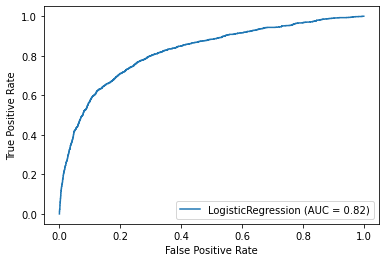

In [348]:
plot_roc_curve(lr_base, X_test_clean, y_test)

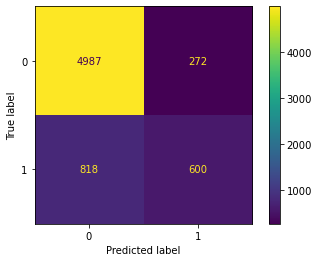

In [349]:
plot_confusion_matrix(lr_base, X_test_clean, y_test)

In [360]:
lr_2 = LogisticRegression(class_weight='balanced', random_state=25, max_iter=250, solver='liblinear')
lr_2.fit(X_train_clean, y_train)

LogisticRegression(class_weight='balanced', max_iter=250, random_state=25,
                   solver='liblinear')

In [361]:
scores2 = cross_val_score(lr_2, X_train_clean, y_train, cv=5)
scores2
print(np.mean(scores2))
print(np.median(scores2))

0.7755866200698951
0.77309036445332


In [362]:
lr_2.score(X_test_clean, y_test)

0.7792421746293245

In [363]:
print(classification_report(y_test, lr_2.predict(X_test_clean)))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      5259
           1       0.49      0.71      0.58      1418

    accuracy                           0.78      6677
   macro avg       0.70      0.75      0.71      6677
weighted avg       0.82      0.78      0.79      6677



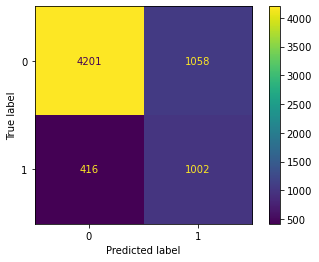

In [364]:
plot_confusion_matrix(lr_2, X_test_clean, y_test)

In [365]:
lr2_preds = lr_2.predict(X_test_clean)
lr2_probs = lr_2.predict_proba(X_test_clean)

print("log loss: ", log_loss(y_test, lr2_probs))
print("accuracy: ", accuracy_score(y_test, lr2_preds))
print("precision:", precision_score(y_test, lr2_preds))
print("recall:   ", recall_score(y_test, lr2_preds))

log loss:  0.5008527109520873
accuracy:  0.7792421746293245
precision: 0.48640776699029126
recall:    0.7066290550070522


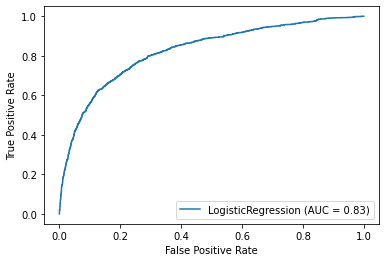

In [366]:
plot_roc_curve(lr_2, X_test_clean, y_test)

## Decision Trees

In [290]:
dt_base = DecisionTreeClassifier(random_state=25)
dt_base.fit(X_train_clean, y_train)

DecisionTreeClassifier(random_state=25)

In [291]:
dt_scores = cross_val_score(dt_base, X_train_clean, y_train, cv=5)
dt_scores
print(np.mean(dt_scores))
print(np.median(dt_scores))

0.7565152271592611
0.7558662006989516


In [292]:
dt_base.score(X_test_clean, y_test)

0.7596225849932604

In [293]:
print(classification_report(y_test, dt_base.predict(X_test_clean)))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5259
           1       0.44      0.45      0.45      1418

    accuracy                           0.76      6677
   macro avg       0.64      0.65      0.65      6677
weighted avg       0.76      0.76      0.76      6677



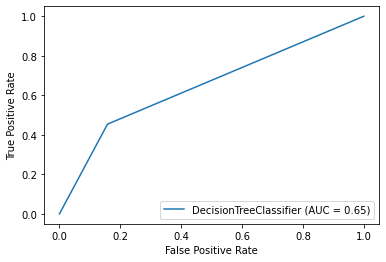

In [294]:
plot_roc_curve(dt_base, X_test_clean, y_test)

In [295]:
#GridSearch to find better params for DT
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split' : [50, 100, 200, 500]
}

In [296]:
dt_gs = GridSearchCV(estimator=dt_base, param_grid=params, cv=5)

In [297]:
dt_gs.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=25),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [50, 100, 200, 500]})

In [298]:
dt_gs.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 200}

In [299]:
pd.DataFrame(dt_gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.106166,0.025360,0.005298,0.001620,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.829506,0.834998,0.831003,0.825262,0.830754,0.830305,0.003123,4
1,0.110239,0.003361,0.005705,0.000884,gini,5,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.829506,0.834748,0.831003,0.825761,0.830754,0.830354,0.002888,2
2,0.112508,0.005876,0.005297,0.000262,gini,5,200,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.830504,0.834748,0.831003,0.825761,0.830504,0.830504,0.002855,1
3,0.110004,0.009070,0.006699,0.002605,gini,5,500,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.829256,0.833749,0.827509,0.819770,0.831503,0.828357,0.004780,11
4,0.234730,0.011084,0.006251,0.000740,gini,10,50,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.815277,0.819271,0.823764,0.815027,0.826510,0.819970,0.004563,25
5,0.234471,0.017592,0.006273,0.000860,gini,10,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.819021,0.825761,0.824264,0.818273,0.827758,0.823015,0.003743,22
6,0.221316,0.015858,0.006611,0.000767,gini,10,200,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.822766,0.830255,0.830504,0.822516,0.829006,0.827009,0.003604,16
7,0.169580,0.007130,0.006432,0.001263,gini,10,500,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.829256,0.833000,0.827009,0.819521,0.830754,0.827908,0.004626,12
8,0.336768,0.016516,0.007076,0.000971,gini,15,50,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.806790,0.809036,0.819770,0.809536,0.817024,0.812431,0.005034,29
9,0.313568,0.031970,0.006480,0.000940,gini,15,100,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.815527,0.821018,0.825012,0.817773,0.821268,0.820120,0.003246,24


In [300]:
params2 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 8, 10, 12],
    'min_samples_leaf' : [75, 150, 200, 300]
}

In [301]:
dt_gs2 = GridSearchCV(estimator=dt_base, param_grid=params2, cv=5)

In [302]:
dt_gs2.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=25),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 8, 10, 12],
                         'min_samples_leaf': [75, 150, 200, 300]})

In [303]:
dt_gs2.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 150}

In [367]:
dt_gs2.best_score_

0.8298552171742386

In [368]:
dt_gs2.score(X_test_clean, y_test)

0.8321102291448256

In [369]:
dt_gs2_preds = dt_gs2.predict(X_test_clean)
dt_gs2_probs = dt_gs2.predict_proba(X_test_clean)

print("log loss: ", log_loss(y_test, dt_gs2_probs))
print("accuracy: ", accuracy_score(y_test, dt_gs2_preds))
print("precision:", precision_score(y_test, dt_gs2_preds))
print("recall:   ", recall_score(y_test, dt_gs2_preds))

log loss:  0.3942308430748938
accuracy:  0.8321102291448256
precision: 0.6426512968299711
recall:    0.4717912552891396


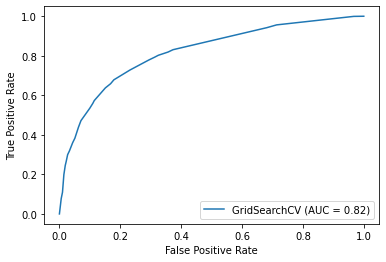

In [370]:
plot_roc_curve(dt_gs2, X_test_clean, y_test)

## Random Forests

In [304]:
rf_base = RandomForestClassifier(random_state=25)
rf_base.fit(X_train_clean, y_train)

RandomForestClassifier(random_state=25)

In [305]:
rf_base_scores = cross_val_score(rf_base, X_train_clean, y_train, cv=5)
rf_base_scores
print(np.mean(rf_base_scores))
print(np.median(rf_base_scores))

0.8321517723414876
0.8317523714428358


In [306]:
forest_score = rf_base.score(X_test_clean, y_test)
forest_score

0.835554889920623

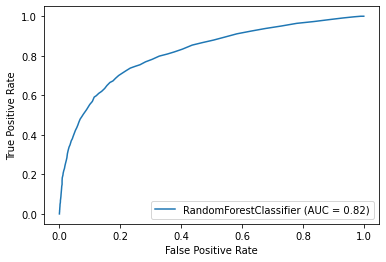

In [307]:
plot_roc_curve(rf_base, X_test_clean, y_test)

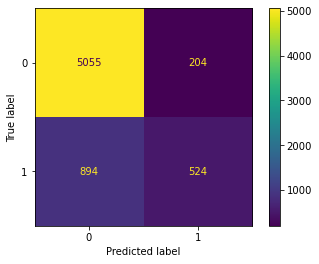

In [308]:
plot_confusion_matrix(rf_base, X_test_clean, y_test)

In [309]:
feat_import = {name: score 
                   for name, score 
                       in zip(X_train_clean.columns, rf_base.feature_importances_)
}
feat_import

{'h1n1_concern': 0.031196222721494433,
 'h1n1_knowledge': 0.023064148587717586,
 'behavioral_antiviral_meds': 0.006486775706009693,
 'behavioral_avoidance': 0.013328284293685839,
 'behavioral_face_mask': 0.008363327359169632,
 'behavioral_wash_hands': 0.009732885153571168,
 'behavioral_large_gatherings': 0.015803415166832938,
 'behavioral_outside_home': 0.015044084871848301,
 'behavioral_touch_face': 0.013734588759089663,
 'doctor_recc_h1n1': 0.10040933366953184,
 'chronic_med_condition': 0.014100247203246817,
 'child_under_6_months': 0.008885755123805796,
 'health_worker': 0.014745148900334354,
 'health_insurance': 0.004453591992718536,
 'opinion_h1n1_vacc_effective': 0.06649254899504936,
 'opinion_h1n1_risk': 0.07469864238500155,
 'opinion_h1n1_sick_from_vacc': 0.03351283793951566,
 'household_adults': 0.023831317186678577,
 'household_children': 0.02093015994801014,
 'x0_18 - 34 Years': 0.009612206541693202,
 'x0_35 - 44 Years': 0.00876407398009035,
 'x0_45 - 54 Years': 0.0098774795

In [310]:
rf_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 8, 10],
    'min_samples_leaf' : [75, 100],
    'min_samples_split': [100, 200]
}

In [311]:
rf_gs = GridSearchCV(estimator=rf_base,param_grid=rf_params, cv=5, return_train_score=True)

In [312]:
rf_gs.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=25),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 8, 10],
                         'min_samples_leaf': [75, 100],
                         'min_samples_split': [100, 200]},
             return_train_score=True)

In [313]:
rf_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 75,
 'min_samples_split': 100}

In [314]:
rf_gs.best_score_

0.8120818771842236

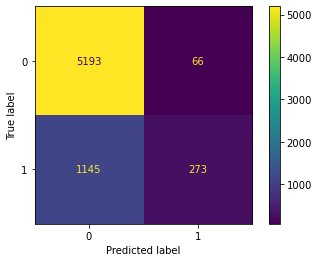

In [315]:
plot_confusion_matrix(rf_gs, X_test_clean, y_test)

In [316]:
rf_params2 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf' : [25, 50, 75],
    'min_samples_split': [50, 100]
}

In [317]:
rf_gs2 = GridSearchCV(estimator=rf_base,param_grid=rf_params2, cv=5)

In [318]:
rf_gs2.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=25),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [25, 50, 75],
                         'min_samples_split': [50, 100]})

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 25, 'min_samples_split': 50}
0.8229156265601597


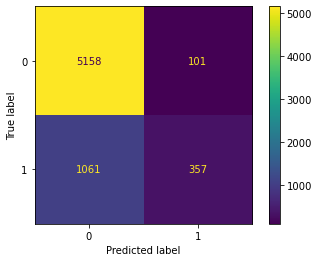

In [319]:
print(rf_gs2.best_params_)
print(rf_gs2.best_score_)
plot_confusion_matrix(rf_gs2, X_test_clean, y_test)

In [320]:
rf_params3 = {
    'criterion': ['entropy'],
    'max_features': ['sqrt', None],
    'max_depth': [5, 10, 20],
}

In [321]:
rf_gs3 = GridSearchCV(estimator=rf_base,param_grid=rf_params3, cv=5)
rf_gs3.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=25),
             param_grid={'criterion': ['entropy'], 'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', None]})

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None}
0.8336994508237643


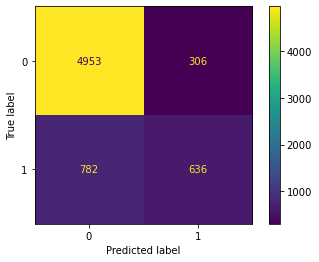

In [322]:
print(rf_gs3.best_params_)
print(rf_gs3.best_score_)
plot_confusion_matrix(rf_gs3, X_test_clean, y_test)

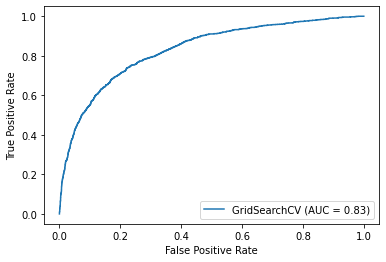

In [323]:
plot_roc_curve(rf_gs3, X_test_clean, y_test)

In [324]:
rf3_preds = rf_gs3.predict(X_test_clean)
rf3_probs = rf_gs3.predict_proba(X_test_clean)

print("log loss: ", log_loss(y_test, rf3_probs))
print("accuracy: ", accuracy_score(y_test, rf3_preds))
print("precision:", precision_score(y_test, rf3_preds))
print("recall:   ", recall_score(y_test, rf3_preds))

log loss:  0.38504134796550177
accuracy:  0.8370525685187958
precision: 0.6751592356687898
recall:    0.44851904090267986


In [325]:
rf4 = RandomForestClassifier(n_estimators=50, random_state=25)
rf4_gs = GridSearchCV(estimator=rf4,param_grid=rf_params3, cv=5)
rf4_gs.fit(X_train_clean, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=50, random_state=25),
             param_grid={'criterion': ['entropy'], 'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', None]})

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None}
0.8337493759360959


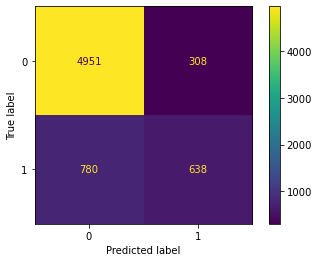

In [326]:
print(rf4_gs.best_params_)
print(rf4_gs.best_score_)
plot_confusion_matrix(rf4_gs, X_test_clean, y_test)

In [327]:
rf4_preds = rf4_gs.predict(X_test_clean)
rf4_probs = rf4_gs.predict_proba(X_test_clean)

print("log loss: ", log_loss(y_test, rf4_probs))
print("accuracy: ", accuracy_score(y_test, rf4_preds))
print("precision:", precision_score(y_test, rf4_preds))
print("recall:   ", recall_score(y_test, rf4_preds))

log loss:  0.3858675014357912
accuracy:  0.8370525685187958
precision: 0.6744186046511628
recall:    0.44992947813822287


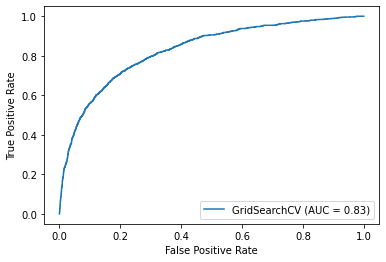

In [328]:
plot_roc_curve(rf4_gs, X_test_clean, y_test)

### Seasonal Flu Target Modeling

In [329]:
#drop h1n1 columns from seasonal flu df
flu_df = df.drop(columns=['h1n1_concern','h1n1_knowledge','doctor_recc_h1n1', 
                'opinion_h1n1_vacc_effective','opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'h1n1_vaccine'],
                axis=1)
flu_df.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,1
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [330]:
flu_df.set_index(keys='respondent_id', inplace=True)
flu_df.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,1
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [331]:
flu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26636 non-null  float64
 1   behavioral_avoidance         26499 non-null  float64
 2   behavioral_face_mask         26688 non-null  float64
 3   behavioral_wash_hands        26665 non-null  float64
 4   behavioral_large_gatherings  26620 non-null  float64
 5   behavioral_outside_home      26625 non-null  float64
 6   behavioral_touch_face        26579 non-null  float64
 7   doctor_recc_seasonal         24547 non-null  float64
 8   chronic_med_condition        25736 non-null  float64
 9   child_under_6_months         25887 non-null  float64
 10  health_worker                25903 non-null  float64
 11  health_insurance             14433 non-null  float64
 12  opinion_seas_vacc_effective  26245 non-null  float64
 13  opinion_seas_ris

In [332]:
y_flu = flu_df['seasonal_vaccine']
X_flu = flu_df.drop('seasonal_vaccine', axis=1)
X_flu_train, X_flu_test, y_flu_train, y_flu_test = train_test_split(X_flu, y_flu, test_size=0.25, random_state=88)

In [333]:
#Imputing "Unknown" into object columns for missing values on columns where survey was not answered
train_cats = X_flu_train.select_dtypes('object')
cat_imp = SimpleImputer(strategy="constant", fill_value="Unknown")
cat_imp.fit(train_cats)
X_flu_train_cats = pd.DataFrame(cat_imp.transform(train_cats), columns = train_cats.columns)
X_flu_train_cats

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,65+ Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",Unknown,Unknown
1,45 - 54 Years,< 12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Rent,Employed,dqpwygqj,"MSA, Principle City",atmlpfrs,xqwwgdyp
2,18 - 34 Years,12 Years,White,Female,Unknown,Not Married,Unknown,Unknown,oxchjgsf,Non-MSA,Unknown,Unknown
3,65+ Years,Some College,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,kbazzjca,"MSA, Not Principle City",Unknown,Unknown
4,45 - 54 Years,College Graduate,White,Female,Unknown,Not Married,Rent,Employed,lrircsnp,"MSA, Principle City",vjjrobsf,xtkaffoo
...,...,...,...,...,...,...,...,...,...,...,...,...
20025,18 - 34 Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,qufhixun,Non-MSA,saaquncn,hfxkjkmi
20026,65+ Years,12 Years,White,Female,Unknown,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",Unknown,Unknown
20027,18 - 34 Years,Unknown,White,Male,Unknown,Unknown,Unknown,Unknown,lzgpxyit,Non-MSA,Unknown,Unknown
20028,35 - 44 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lrircsnp,"MSA, Principle City",vjjrobsf,oijqvulv


In [334]:
test_cats = X_flu_test.select_dtypes('object')
X_flu_test_cats = pd.DataFrame(cat_imp.transform(test_cats), columns = test_cats.columns)
X_flu_test_cats

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,fpwskwrf,Non-MSA,Unknown,Unknown
1,55 - 64 Years,12 Years,Hispanic,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,qufhixun,Non-MSA,Unknown,Unknown
2,65+ Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lzgpxyit,Non-MSA,Unknown,Unknown
3,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lrircsnp,"MSA, Principle City",wxleyezf,mxkfnird
4,35 - 44 Years,< 12 Years,White,Male,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,Non-MSA,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
6672,55 - 64 Years,< 12 Years,Other or Multiple,Female,"<= $75,000, Above Poverty",Married,Own,Employed,kbazzjca,Non-MSA,fcxhlnwr,cmhcxjea
6673,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,bhuqouqj,"MSA, Principle City",ldnlellj,hfxkjkmi
6674,45 - 54 Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Unemployed,qufhixun,"MSA, Not Principle City",Unknown,Unknown
6675,35 - 44 Years,College Graduate,Other or Multiple,Female,Unknown,Married,Own,Employed,kbazzjca,"MSA, Principle City",fcxhlnwr,emcorrxb


In [335]:
 X_flu_train_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age_group              20030 non-null  object
 1   education              20030 non-null  object
 2   race                   20030 non-null  object
 3   sex                    20030 non-null  object
 4   income_poverty         20030 non-null  object
 5   marital_status         20030 non-null  object
 6   rent_or_own            20030 non-null  object
 7   employment_status      20030 non-null  object
 8   hhs_geo_region         20030 non-null  object
 9   census_msa             20030 non-null  object
 10  employment_industry    20030 non-null  object
 11  employment_occupation  20030 non-null  object
dtypes: object(12)
memory usage: 1.8+ MB


In [336]:
 #Imputing median value on numerical columns where survey response was not recorded.
train_nums = X_flu_train.select_dtypes(exclude='object')
num_imp = SimpleImputer(strategy='median')
num_imp.fit(train_nums)
X_flu_train_nums = pd.DataFrame(num_imp.transform(train_nums), columns = train_nums.columns)
X_flu_train_nums

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,3.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,4.0,5.0,0.0,0.0
3,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,5.0,0.0,0.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,5.0,5.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,4.0,3.0,1.0
20026,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,5.0,4.0,2.0,0.0,0.0
20027,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,1.0,2.0
20028,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,1.0,1.0


In [337]:
test_nums = X_flu_test.select_dtypes(exclude='object')
X_flu_test_nums = pd.DataFrame(num_imp.transform(test_nums), columns = test_nums.columns)
X_flu_test_nums

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,3.0,2.0,1.0,0.0
1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,4.0,4.0,4.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,1.0,0.0
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6672,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,5.0,4.0,2.0,1.0,1.0
6673,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,1.0,0.0
6674,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,4.0,2.0,2.0,1.0
6675,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,1.0,1.0


In [338]:
X_flu_train_nums.isna().sum()

behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
dtype: int64

In [339]:
X_flu_train = pd.concat([X_flu_train_nums, X_flu_train_cats], axis=1)
X_flu_train.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",Unknown,Unknown
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,Black,Female,"<= $75,000, Above Poverty",Not Married,Rent,Employed,dqpwygqj,"MSA, Principle City",atmlpfrs,xqwwgdyp
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,White,Female,Unknown,Not Married,Unknown,Unknown,oxchjgsf,Non-MSA,Unknown,Unknown
3,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,kbazzjca,"MSA, Not Principle City",Unknown,Unknown
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,White,Female,Unknown,Not Married,Rent,Employed,lrircsnp,"MSA, Principle City",vjjrobsf,xtkaffoo


In [340]:
X_flu_test = pd.concat([X_flu_test_nums, X_flu_test_cats], axis=1)
X_flu_test.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,fpwskwrf,Non-MSA,Unknown,Unknown
1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,qufhixun,Non-MSA,Unknown,Unknown
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lzgpxyit,Non-MSA,Unknown,Unknown
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lrircsnp,"MSA, Principle City",wxleyezf,mxkfnird
4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,Non-MSA,Unknown,Unknown


In [341]:
X_flu_test.isna().sum()

behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
employment_industry            0
employment_occupation          0
dtype: int64